<a href="https://colab.research.google.com/github/harishsahadev/MLP_LectureCodes/blob/main/Week1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L1.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [ ]:
data.info() # quick description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
  data.describe() # This one prints count and statistical properties - mean, standard deviations and quartiles

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The information can be viewed through histogram plot.
* A Histogram gives the count of how many samples occurs within a specific range (bins).
* The x-axis denotes the range of values in a feature and
* The y-axis denotes the frequency of samples with those specific values.

Text(0, 0.5, 'Count')

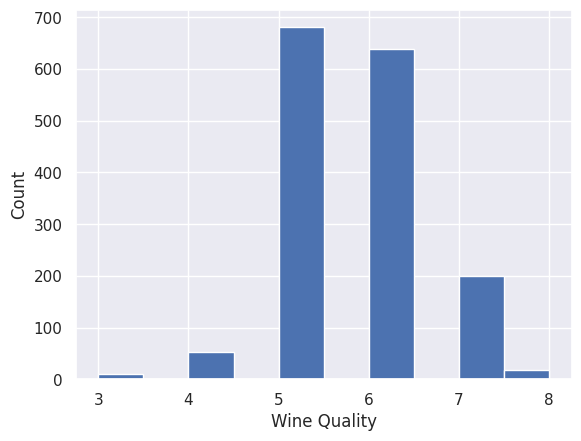

In [ ]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

[Text(0.5, 1.0, 'Total sulfur dioxide')]

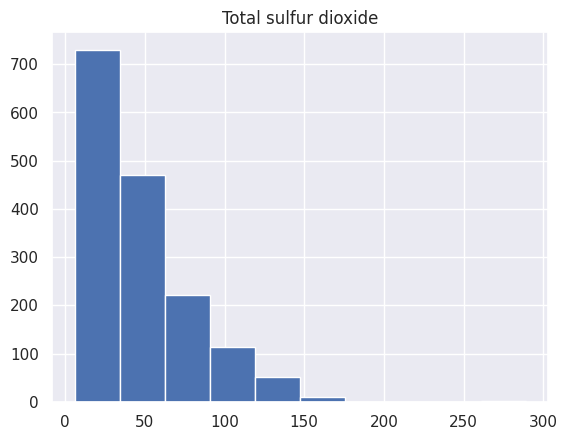

In [ ]:
data['total sulfur dioxide'].hist().set(title='Total sulfur dioxide')

In [ ]:
def split_train_test(data, test_ratio):
  # set the random seed
  np.random.seed(42)

  # shuffle the dataset.
  shuffled_indices = np.random.permutation(len(data))

  # calculate the size of the test set.
  test_set_size = int(len(data) * test_ratio)

  # split dataset to get training and test sets
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(data, 0.2)

#Scikit-Learn provides a few functions for creating test sets based on
1. Random sampling, which randomly selects % points in the test set. k
2. Stratified sampling, which samples test examples such that they are
representative of overall distribution.

##Random sampling
* train_test_split() function performs random sampling with
    * random_state parameter to set the random seed, which ensures that the same examples are selected for test sets across runs.
    * test_size parameter for specifying size of the test set.
    * shuffle flag to specify if the data needs to be shuffled before splitting.
* Provision for processing multiple datasets with an identical number of rows and selecting the same indices from these datasets.
    * Useful when labels are in different dataframe.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

##Stratified sampling
* Data distribution may not be uniform in real world data.
* Random sampling - by its nature - introduces biases in such data sets.
* Recall the label distribution in our dataset. Many examples of class 5 and 6 compared to the other classes. This causes a problem while random sampling. The test distribution may not match with the overall distribution.

###How do we sample in such cases?
* We divide the population into homogenous groups called strata.
* Data is sampled from each stratum so as to match it with the overall data distribution.
* Scikit-Learn provides a class StratifiedShuffleSplit that helps us in stratified sampling.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [ ]:
# Let's examine the test set distribution by the wine quality that was used for stratified sampling.
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [ ]:
# Now compare this with the overall distribution
overall_dist = data["quality"].value_counts() / len(data)

In [ ]:
# Look at them side by side

dist_comparision = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparision['diff(s-o)'] = dist_comparision['stratified'] - dist_comparision['overall']
dist_comparision['diff(s-o)_pct'] = 100 * (dist_comparision['diff(s-o)']/dist_comparision['overall'])

In [ ]:
dist_comparision

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [ ]:
# Contrast this with random sampling

random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

# L1.2

## Data Visualization

* Performed on training set.
* In case of large training set -
  * Sample examples to form exploration set.
* Enables to understand features and their relationship among themselves and with
output label.

### Scatter Visualization

#### With seaborn library

In [ ]:
exploration_set = strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

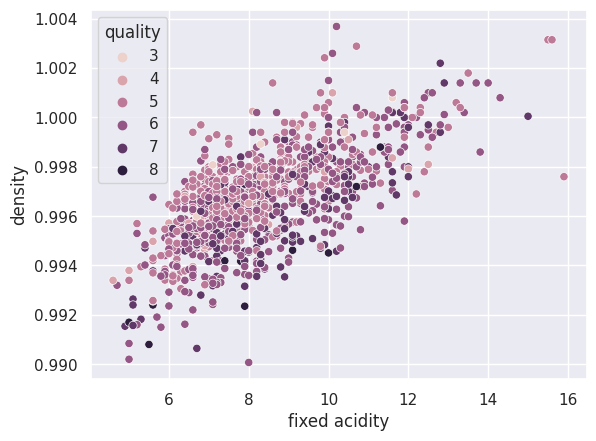

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

#### With matplotlib

<Axes: xlabel='fixed acidity', ylabel='density'>

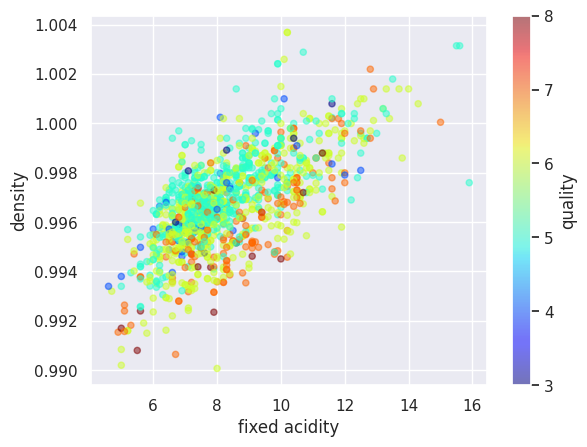

In [ ]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c='quality', cmap=plt.get_cmap("jet"))

## Relationship between features

* Standard correlation coefficient between features.
  * Ranges between -1 to +1
    * Correlation = +1: Strong positive correlation between features
    * Correlation = -1: Strong negative correlation between features
    * Correlation = 0: No linear correlation between features
  * Visualization with heat map
* Only captures linear relationship between features.
  * For non-linear relationship, use rank correlation

In [ ]:
corr_matrix = exploration_set.corr()

In [ ]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

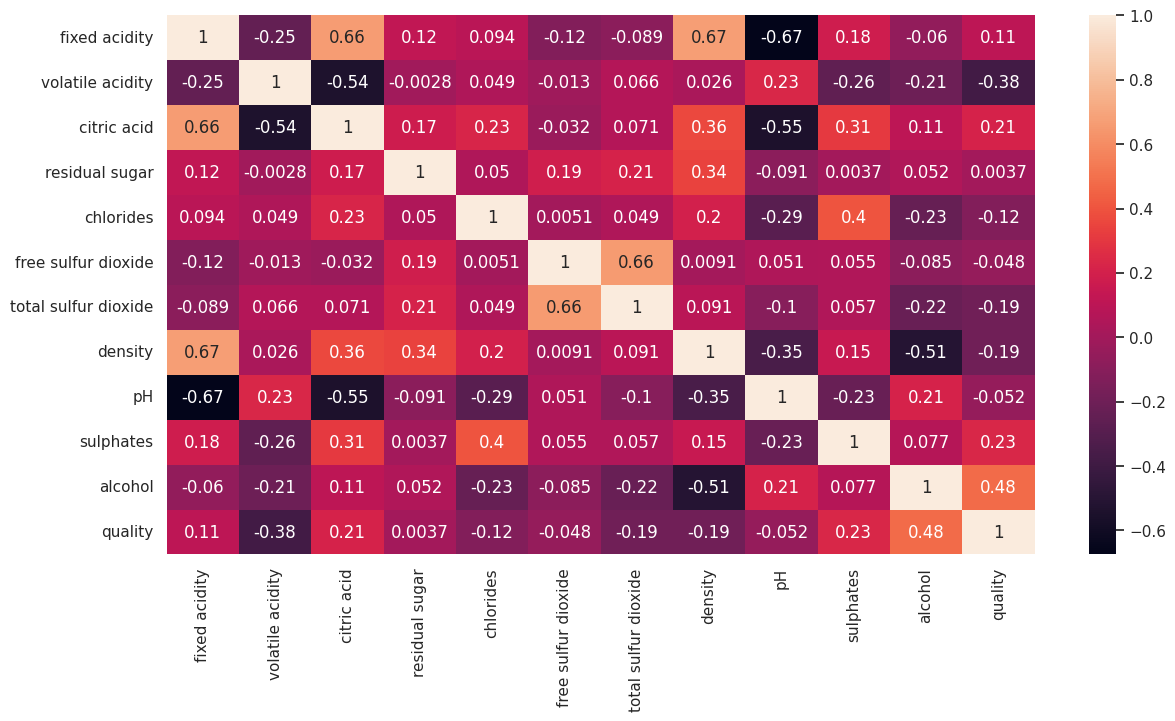

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)

Another option to visualize the relationship between the feature is with scatter matrix.

(2.875, 8.125, 0.0, 572.25)

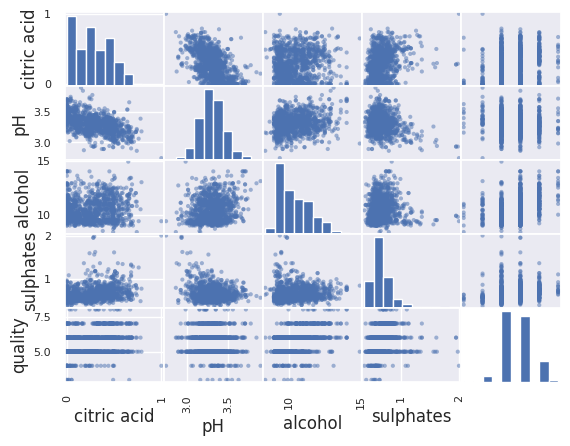

In [ ]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])
plt.axis("off")   # turns off axes
# plt.axis("tight")  # gets rid of white border
# plt.axis("image")  # square up the image instead of filling the "figure" space

# L1.4

## Step 4: Prepare data for ML algorithm

Typical steps in data preprocessing are as follows:
1. Separate features and labels.
2. Handling missing values and outliers.
3. Feature scaling to bring all features on the same scale.
4. Applying certain transformations like log, square root on the features.

It's a good practice to make a copy of the data and apply preprocessing on that copy. This ensures that in case something goes wrong, we will at least have original copy of
the data intact.

### 4.1 Separate features and labels from the training set.

In [ ]:
import os
# Copy all features leaving aside label
wine_features = strat_train_set.drop("quality", axis=1)

# Copy the label list
wine_labels = strat_train_set["quality"].copy()

# print(wine_features)
# print(wine_labels)

### 4.2 Data cleaning

Check if there are any missing values in feature set

In [ ]:
wine_features.isna().sum() # counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Sklearn provides the following methods to drop rows containing missing values:
* dropna()
* drop()

It provides *SimpleImputer* class for filling up missing values with. say, median (or average, lowest, highest) value.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The strategy contains instructions as how to replace the missing values. In this case, we specify that the missing value should be replaced by the median value.

In [ ]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [ ]:
# Check the statistics learnt by the imputer on the training set
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [ ]:
# cross-checking it by calculating median on the feature set
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Use the trained imputer to transform the training set such that the missing values are replaced by the medians.

This returns a Numpy array and we can convert it to the dataframe if needed:

In [ ]:
tr_features = imputer.transform(wine_features)
tr_features

array([[ 6.7  ,  0.855,  0.02 , ...,  3.3  ,  0.56 , 10.75 ],
       [ 6.9  ,  0.63 ,  0.33 , ...,  3.22 ,  0.56 ,  9.5  ],
       [11.9  ,  0.57 ,  0.5  , ...,  3.12 ,  0.78 , 10.7  ],
       ...,
       [ 7.8  ,  0.43 ,  0.32 , ...,  3.31 ,  0.64 , 10.3  ],
       [11.2  ,  0.5  ,  0.74 , ...,  3.22 ,  0.62 , 11.2  ],
       [ 8.7  ,  0.42 ,  0.45 , ...,  3.33 ,  0.77 , 12.   ]])

In [ ]:
tr_features.shape

(1279, 11)

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


### 4.3 Handling text and categorical attributes

#### 4.3.1 Converting categories to numbers:
* Call fit_transform() method on ordinal_encoder object to convert text to numbers.
* The list of categories can be obtained via categories_ instance variable.

One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than the distinct ones.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#### 4.3.2 Using one hot encoding

* Here we create one binary feature per category - the feature value is 1 when the category is present else it is 0.
* Only one feature is 1 (hot) and the rest are 0 (cold).
* The new features are referred to as dummy features.
* Scikit-Learn provides a **OneHotEncoder** class to convert categorical values into one-hot vectors.
* We need to call **fit_transform()** method on **OneHotEncoder** object.
* The output is a SciPy sparse matrix rather than NumPy array. This enables us to save space when we have a huge number of categories.
* In case we want to convert it to dense representation, we can do so with toarray() method.
* The list of categories can be obtained via **categories_** instance variable.
* As we observed that when the number of categories are very large, the one-hot encoding would result in a very large number of features.
* This can be addressed with one of the following approaches:
  * Replace with categorical numerical features
  * Convert into low-dimensional learnable vectors called embeddings

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

### 4.4 Feature Scaling

* Most ML algorithms do not perform well when input features are on very different scales.
* Scaling of target label is generally not required.

#### 4.5.1 Min-max scaling or Normalization
* We subtract minimum value of a feature from the current value and divide it by the difference between the minimum and the maximum value of that feature.
* Values are shifted and scaled so that they range between 0 and 1.
* Scikit-Learn provides **MinMaxScalar transformer** for this.
* One can specify hyperparameter **feature_range** to specify the range of the feature.

#### 4.5.2 Standardization
* We subtract mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
* While normalization bounds values between 0 and 1, standardization does not bound values to a specific range.
* Standardization is less affected by the outliers compared to the normalization.
* Scikit-Learn provides StandardScalar transformation for feature standardization.
* Note that all these transformers are learnt on the training data and then applied on the training and test data to tranform them.
* **Never learn these transformers on the full dataset.**

### Transformation Pipeline

Scikit-Learn provides a Pipeline class to line up transformations in an intended order.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
                          ('imputer', SimpleImputer(strategy="median")), # imputer transformation
                          ('std_scalar', StandardScaler()), # standard scalar transformation
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)
wine_features_tr

array([[-0.94797009,  1.84038456, -1.30310213, ..., -0.05665069,
        -0.58149257,  0.30561112],
       [-0.8299525 ,  0.57378326,  0.28806218, ..., -0.58456494,
        -0.58149257, -0.86781667],
       [ 2.12048734,  0.23602292,  1.16063616, ..., -1.24445776,
         0.65244695,  0.258674  ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.00933859,
        -0.13278729, -0.11682289],
       [ 1.70742577, -0.15803082,  2.3925053 , ..., -0.58456494,
        -0.24496361,  0.72804512],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.14131716,
         0.59635879,  1.4790389 ]])

Let's understand what is happening here:
* Pipeline has a sequence of transformations - missing value imputation followed by standardization.
* Each step in the sequence is defined by **name, estimator** pair.
* Each name should be unique and should not contain __ (double underscore).
* The output of one step is passed on the next one in sequence until it reaches the last step.
  * Here the pipeline first performs imputation of missing values and its
  result is passed for standardization.
* The pipeline exposes the same method as the final estimator.
  * Here **StandardScalar** is the last estimator and since it is a transformer, we call **fit_transform()** method on the **Pipeline** object.

#### How to transform mixed features?
* The real world data has both categorical as well as numerical features and we need to apply different transformations to them.
* Scikit-Learn introduced **ColumnTransformer** for this purpose.

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
# Code for illustration purpose

# num_attribs = list(wine_features)
# cat_attribs = ["place_of_manufacturing"]
# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs), # numerical features use num_pipeline
#     ("cat", OneHotEncoder(), cat_attribs) # Categorical features use OneHotEncoder
# ])
# wine_features_tr = full_pipeline.fit_transform(wine_features)

# L1.4

## Step 5: Select and train ML model

* It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

Evaluate performance of the model on training as well as test sets.
* For regression models, we use mean squared error as an evaluation measure.

In [ ]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

Evaluate performance on the test set.
* Need to first apply transformation on the test set and then apply the model prediction
function.

In [ ]:
# copy all features leaving aisde the label
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformation
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict fuction and calculate MSE
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501518

Text(0, 0.5, 'Predicted quality')

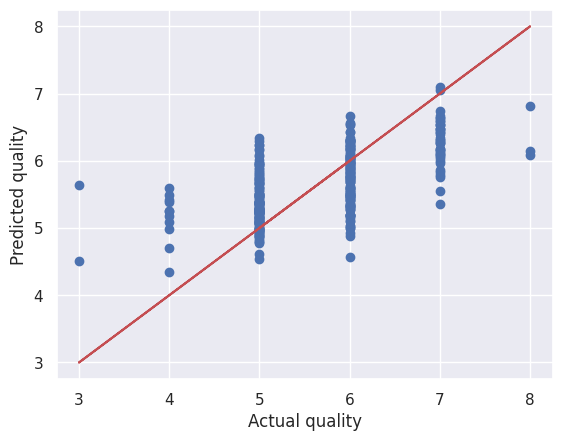

In [ ]:
# Visualize the error between the actual and predicted values using scatter plot.

plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Another model: DecisionTreeRegressor.
syntax similar to LinearRegreesor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [ ]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [ ]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

# This is an example of overfitted model

0.58125

Text(0, 0.5, 'Predicted quality')

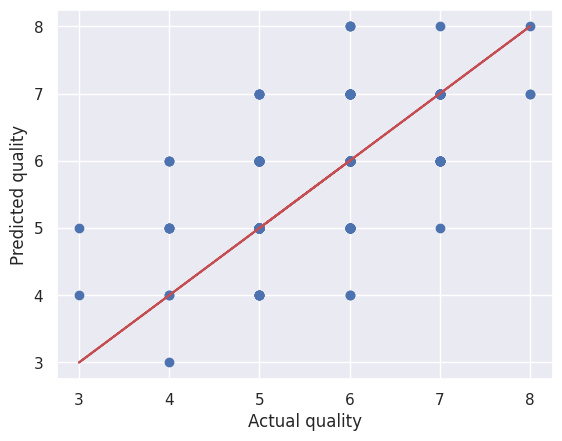

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

We can use cross-validation (CV) for robust evaluation of model performance.

* Cross validation provides a separate MSE for each validation set, which we can use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate.
* The additional cost we pay in cross validation is additional training runs, which may be too expensive in certain cases.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
  def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# Linear Regression CV

scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10) # 10 folds for cross validation (cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413969


In [ ]:
# Linear Regression CV

scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10) # 10 folds for cross validation (cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard deviation: 0.16668343331737054


LinReg has better MSE and more precise estimation compared to DT.

Random forest CV
* Random forest model builds multiple decision trees on randomly selected features and then average their predictions.
* Building a model on top of other model is called ensemble learning, which is often used to improve performance of ML models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10) # 10 folds for cross validation (cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean: 0.34565226131889765
Standard deviation: 0.0736322184302973


In [ ]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34449875

Text(0, 0.5, 'Predicted quality')

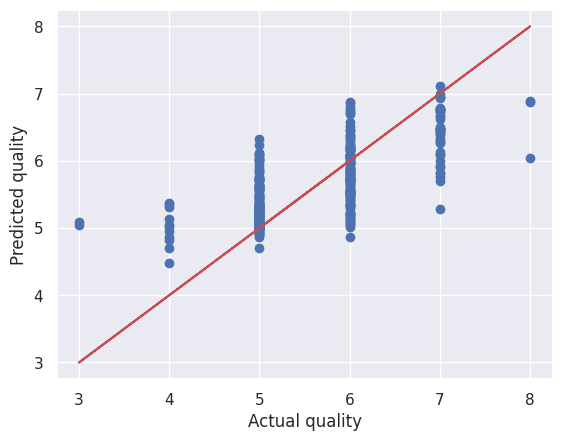

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Random forest looks more promising than the other two models.
* It's a good practice to build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.
* Also save the models to the disk in Python **pickle** format.

# L1.5

## Step 6: Finetune your model

* Usually there are a number of hyperparameters in the model, which are set manually.
* Tuning these hyperparameters lead to better accuracy of ML models.
* Finding the best combination of hyperparameters is a search problem in the
space of hyperparameters, which is huge.

### Grid search
* Scikit-Learn provives a class GridSearchCV that helps us in this pursuit.
* Need to specify a list of hyperparameters along with the range of values to try.
* It automatically evaluates all possible combinations of hyperparameter values using cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV

For example, there are number of hyperparameters in RandomForest regression such as:
* Number of estimators
* Maximum number of features

In [ ]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

Here the parameter grid contains two combinations:
1. The first combination contains n_estimators with 3 values and max_features with 4 values.
2. The second combination has an additional bootstrap parameter, which is set to
False. Note that it was set to its default value, which is True, in the first grid.

Let's compute the total combinations evaluated here:
1. The first one results in 3 × 4 = 12 combinations.
2. The second one has 2 values of n_estimators and 3 values of max_features, thus resulting 2 × 3 = 6 in total of values.

The total number of combinations evaluated by the parameter grid 12 + 6 = 18

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

* In this case, we set cv=5 i.e. using 5 fold cross validation for training the model.
* We need to train the model for 18 parameter combinations and each combination would be trained 5 times as we are using cross-validation here.
* The total model training runs = 18 × 5 = 90

In [ ]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_  # obtaining best combination of parameters

{'max_features': 6, 'n_estimators': 30}

In [ ]:
cvres = grid_search.cv_results_ # error at different parameter settings
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

As you can notice the lowest MSE is obtained for the best parameter combination --> 0.35285364923747276 {'max_features': 6, 'n_estimators': 30}

In [ ]:
# Obtaining best estimator

grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Randomized
* Search When we have a large hyperparameter space, it is desirable to try RandomizedSearchCV.
* It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.
* It enables us to search hyperparameter space with appropriate budget control.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Analysis of best model and its errors

feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
sorted(zip(feature_importances, feature_list), reverse=True) # Feature importance in descending order of importance

[(0.2486711653610271, 'alcohol'),
 (0.14163642739406354, 'sulphates'),
 (0.12665569639367016, 'volatile acidity'),
 (0.08045272518319231, 'total sulfur dioxide'),
 (0.07275072016325315, 'density'),
 (0.05822554296729619, 'citric acid'),
 (0.05791188978825248, 'chlorides'),
 (0.057124416693656116, 'pH'),
 (0.056416454671447944, 'residual sugar'),
 (0.05388861091468478, 'fixed acidity'),
 (0.04626635046945642, 'free sulfur dioxide')]

* Based on this information, we may drop features that are not so important.
* It is also useful to analyze the errors in prediction and understand its causes and fix them.

### Evaluation on test set

Now that we have a reasonable model, we evaluate its performance on the test set. The following steps are involved in the process:

1. Transform the test features.

In [ ]:
# copy all features leaving aside the label
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set["quality"].copy()

# apply transformations
wine_features_test_tr - transform_pipeline.fit_transform(wine_features_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

2. Use the predict method with the trained model and the test set

In [ ]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics

In [ ]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.35345138888888883

4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be obtained by the following code:

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                  loc = squared_errors.mean(),
                  scale = stats.sem(squared_errors))

(0.2915927656958191, 0.41531001208195856)

## Step 7: Present your solution

Once we have satisfactory model based on its performance on the test set, we reach the prelaunch phase.

Before launch,
1. We need to present our solution that highlights learnings, assumptions and systems limitation.
2. Document everything, create clear visualizations and present the model.
3. In case, the model does not work better than the experts, it may still be a
good idea to launch it and free up bandwidths of human experts.

## Step 8: Launch, monitor and maintain your system
Launch
* Plug in input sources and
* Write test cases

Monitoring
* System outages
* Degradation of model performance
* Sampling predictions for human evaluation
* Regular assessment of data quality, which is critical for model performance

Maintenance
* Train model regularly every fixed interval with fresh data.
* Production roll out of the model.

#L 1.7.2


## Loading iris dataset

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
type(data) # Bunch object - is a dictionary like object

sklearn.utils._bunch.Bunch

In [ ]:
data.feature_names # names of features in this dataset

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names # names of labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.data[:5] # feature matrix can be accessed by data.data. Look at first five examples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
data.data.shape

(150, 4)

In [ ]:
data.target # Examine the label vector a\

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
?load_iris # additional documentation about iris dataset

Object `load_iris # additional documentation about iris dataset` not found.


Can obtain feature matrix and label or target from load_iris and other loader by setting return_X_y argument to True

In [ ]:
feature_matrix, label_vector = load_iris(return_X_y=True)
print('Shape of feature matrix', feature_matrix.shape)
print("Shape of label vector", label_vector.shape)

Shape of feature matrix (150, 4)
Shape of label vector (150,)


### Wine Dataset

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
?load_wine

In [ ]:
data = load_wine()

In [ ]:
data.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [ ]:
data.data.shape

(178, 13)

In [ ]:
data.data[:5]  # first 5 samples

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
data.target.shape

(178,)

In [ ]:
 data.target[:5] # labels of the first 5 examples

array([0, 0, 0, 0, 0])

In [ ]:
data.feature_names # names of features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
data.target_names # names of class labels

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Fetchers

### Step 1: Import the library and access the documentation

In [ ]:
from sklearn.datasets import fetch_california_housing
?fetch_california_housing

### Step 2: Load the dataset and obtain a Bunch object

In [ ]:
# Call the loader and obtain the 'Bunch' object
housing_data = fetch_california_housing()

### Step 3: Examine the bunch object

In [ ]:
housing_data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [ ]:
housing_data.data.shape

(20640, 8)

In [ ]:
housing_data.data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [ ]:
housing_data.data.shape

(20640, 8)

In [ ]:
housing_data.target.shape

(20640,)

In [ ]:
housing_data.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [ ]:
# Get the names of the features

housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing_data.target_names

['MedHouseVal']

## fetch_openml

In [ ]:
from sklearn.datasets import fetch_openml
?fetch_openml

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Feature matrix shape:", X.shape)
print("Label shape:", y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Feature matrix shape: (70000, 784)
Label shape: (70000,)


## Generators

### make_regression

In [ ]:
from sklearn.datasets import make_regression
?make_regression

#### Example 1
Let's generate 100 samples with 5 features for a single label regression problem

In [ ]:
X, y = make_regression(n_samples=100, n_features=5, n_targets=1, shuffle=True, random_state=42)

In [ ]:
X.shape

(100, 5)

In [ ]:
y.shape

(100,)

#### Example 2

Let's generate 100 samples with 5 features for multiple regression problem with 5 outputs

In [ ]:
X, y = make_regression(n_samples=100, n_features=5, n_targets=5, shuffle=True, random_state=42)

In [ ]:
X.shape

(100, 5)

In [ ]:
y.shape

(100, 5)

### make_classification

Generate a random n-class classification problem set up

In [ ]:
from sklearn.datasets import make_classification
?make_classification

Generate a binary classification problem with 10 features and 100 samples

In [ ]:
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, n_clusters_per_class=1, random_state=42)

In [ ]:
X.shape

(100, 10)

In [ ]:
y.shape

(100,)

### make_multilabel_classification

Generate a random multi-label classification problem set up

In [ ]:
from sklearn.datasets import make_multilabel_classification
?make_multilabel_classification

Generate a multiclass classification problem with 100 samples, 10 features, 5 lables and on an average 2 labels per example

In [ ]:
X, y = make_multilabel_classification(n_samples=100, n_features=20, n_classes=5, n_labels=2)

In [ ]:
X.shape

(100, 20)

In [ ]:
y.shape

(100, 5)

In [ ]:
X[:5]

array([[0., 3., 3., 3., 1., 5., 3., 1., 2., 0., 2., 2., 5., 2., 2., 2.,
        1., 3., 1., 1.],
       [1., 2., 6., 5., 4., 4., 6., 0., 2., 5., 1., 2., 2., 2., 6., 2.,
        3., 2., 1., 0.],
       [2., 2., 0., 5., 6., 5., 4., 1., 1., 4., 1., 2., 4., 2., 2., 2.,
        2., 2., 2., 2.],
       [0., 1., 1., 3., 4., 1., 1., 2., 2., 4., 0., 3., 3., 3., 2., 2.,
        0., 1., 2., 1.],
       [3., 4., 0., 1., 0., 2., 7., 1., 1., 1., 1., 2., 3., 2., 3., 2.,
        2., 2., 0., 0.]])

In [ ]:
y[:5]

array([[0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 0]])

### make_blobs

make_blobs enables us to generate random data for clustering

In [ ]:
from sklearn.datasets import make_blobs
?make_blobs

In [ ]:
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=42)
print("Feature matrix shape:", X.shape)
print("Label shape:", y.shape)

Feature matrix shape: (10, 2)
Label shape: (10,)


In [ ]:
y

array([2, 2, 1, 2, 0, 0, 0, 1, 1, 0])

# GA 1

In [ ]:
from sklearn.datasets import load_breast_cancer
# ?load_breast_cancer

In [ ]:
breast_cancer_data = load_breast_cancer()

# Q2, Q3
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# Q1

breast_cancer_data.data.shape

(569, 30)

In [ ]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
feature_matrix, label_vector = load_breast_cancer(return_X_y=True)
print('Shape of feature matrix', feature_matrix.shape)
print("Shape of label vector", label_vector.shape)

Shape of feature matrix (569, 30)
Shape of label vector (569,)


In [ ]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Q4

housing_data.data.shape

(20640, 8)

In [ ]:
# Q5

housing_data.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [ ]:
# Q6

housing_data.target_names

['MedHouseVal']

# PA 1

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
# Q1

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
feature_matrix, label_vector = load_iris(return_X_y=True)
print('Shape of feature matrix', feature_matrix.shape)
print("Shape of label vector", label_vector.shape)

Shape of feature matrix (150, 4)
Shape of label vector (150,)


In [ ]:
from sklearn.datasets import make_regression
?make_regression

In [ ]:
X, y = make_regression(n_samples=200, n_features=10, n_targets=10, shuffle=True)

In [ ]:
# Q2

print(X.shape)
print(y.shape)

(200, 10)
(200, 10)


In [ ]:
from sklearn.datasets import make_multilabel_classification
?make_multilabel_classification

In [ ]:
# Q3

X, y = make_multilabel_classification(n_samples=200, n_features=10, n_classes=7, n_labels=3)

print(X.shape)
print(y.shape)

(200, 10)
(200, 7)


In [ ]:
from sklearn.datasets import load_diabetes
?load_diabetes

In [ ]:
data = load_diabetes(as_frame=True, return_X_y=True)

In [ ]:
type(data)

tuple

In [ ]:
# Q5

print(type(data[0]), type(data[1]))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
